In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
# Opening up the files
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

In [3]:
X_train = data_list[0]
y_train = data_list[1]
X_test = data_list[2]
y_test = data_list[3]

### RFC without feat. selection

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Import the necessary libraries if you haven't already.

# 2. Create an instance of the RFC.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# 3. Fit the RFC to your training data.
rfc.fit(X_train, y_train)

# 4. Make predictions on your test data.
y_pred = rfc.predict(X_test)

# 5. Generate a classification report.
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.63      0.59      0.61      3352
        Good       0.66      0.71      0.68      3860

    accuracy                           0.65      7212
   macro avg       0.65      0.65      0.65      7212
weighted avg       0.65      0.65      0.65      7212



## RFC with top 10 feat.

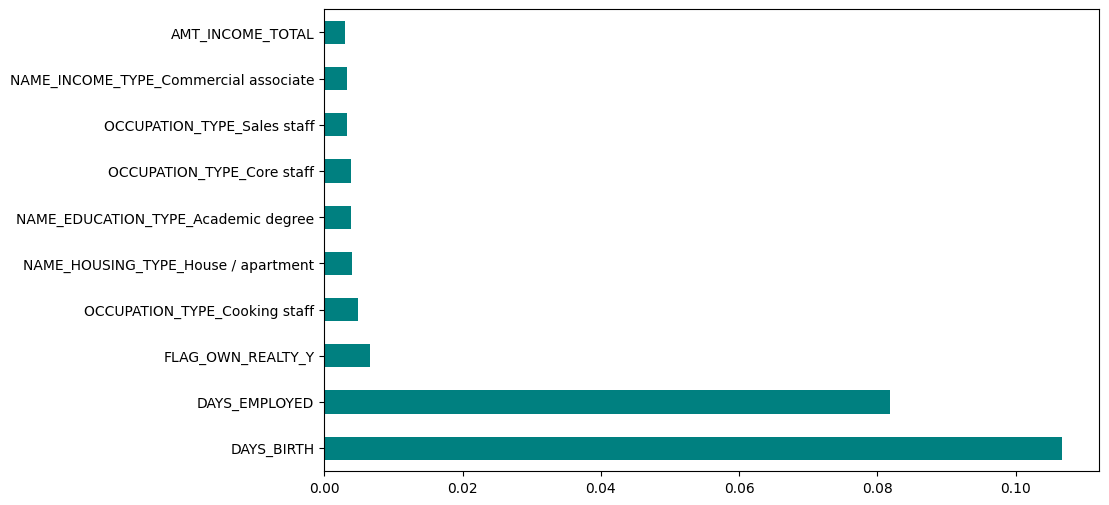

In [15]:
# top 10
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, X_train.columns)

# Select the top 10 features
top_10_feats = feat_importances.nlargest(10)


plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh', color='teal')
plt.show()

In [19]:
top_10_feature_names = top_10_feats.index
X_train_top_10 = X_train[top_10_feature_names]
X_test_top_10 = X_test[top_10_feature_names]

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Import the necessary libraries if you haven't already.

# 2. Create an instance of the RFC.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# 3. Fit the RFC to your training data.
rfc.fit(X_train_top_10, y_train)

# 4. Make predictions on your test data.
y_pred = rfc.predict(X_test_top_10)

# 5. Generate a classification report.
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.58      0.54      0.56      3352
        Good       0.63      0.67      0.65      3860

    accuracy                           0.61      7212
   macro avg       0.61      0.60      0.60      7212
weighted avg       0.61      0.61      0.61      7212

